# Finding the Minimum of a Function Using an Optimizer

## Table of contents
1. [Forth-order equation to find the Minimum](#Locate-the-global-minimum-using-the-following-fourth-order-equation)
2. [Findind the Minimum with Adam Optimizer](#Adam-Optimizer)
3. [Findind the Minimum with SGD Optimizer](#SGD-Optimizer)
4. [Findind the Minimum with Ftrl Optimizer](#Ftrl-Optimizer)
5. [Observations](#Observations)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Locate the global minimum using the following fourth-order equation
***

**Fourth order equation - Loss function:** $y = (x-A)(x-B)(x-C)(x-D)$<br>
_Where:_ <br>
* $A =$ 4<br>
* $B =$ 4<br>
* $C =$ 1<br>
* $D =$ 5<br>

_Find the value of of $x$ which gives the minimum value of $y$._

In [2]:
#Assign values to variables
A, B, C, D = 4, 4 ,1, 5

#Explore with differet domains
x1 = np.linspace(-1000,1000,1000)
x2 = np.linspace(-25,25,1000)
x3 = np.linspace(0,1000000,1000)
x4 = np.linspace(-1000000,0,1000)

#Values of y for the different domains
y1 = (x1-A)*(x1-B)*(x1-C)*(x1-D)
y2 = (x2-A)*(x2-B)*(x2-C)*(x2-D)
y3 = (x3-A)*(x3-B)*(x3-C)*(x3-D)
y4 = (x4-A)*(x4-B)*(x4-C)*(x4-D)

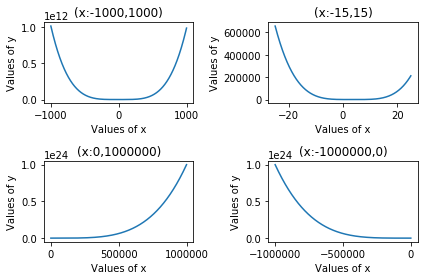

In [3]:
# Initialize the subplot function using number of rows and columns
figure, axis = plt.subplots(nrows=2, ncols=2,)

# For x1
axis[0, 0].plot(x1, y1)
axis[0, 0].set_title("(x:-1000,1000)")
axis[0, 0].set_xlabel("Values of x")
axis[0, 0].set_ylabel("Values of y")

# For x2
axis[0, 1].plot(x2, y2)
axis[0, 1].set_title("(x:-15,15)")
axis[0, 1].set_xlabel("Values of x")
axis[0, 1].set_ylabel("Values of y")
  
# For x3
axis[1, 0].plot(x3, y3)
axis[1, 0].set_title("(x:0,1000000)")
axis[1, 0].set_xlabel("Values of x")
axis[1, 0].set_ylabel("Values of y")
  
# For x4
axis[1, 1].plot(x4, y4)
axis[1, 1].set_title("(x:-1000000,0)")
axis[1, 1].set_xlabel("Values of x")
axis[1, 1].set_ylabel("Values of y")
  
# Join plots and display
plt.tight_layout()

In the code above we are exploring how the fourth-order equation behaves with the values it was assigned. After exploring with different domains, we can see in the plots there is only one minima.

In [4]:
def foe(x):
    """Fourth-order equation"""
    y = (x-A)*(x-B)*(x-C)*(x-D)
    return y

### Adam Optimizer
***
[Return to top](#Assignment-1:-Finding-the-Minimum-of-a-Function-Using-an-Optimizer)<br>
[SGD Optimizer](#SGD-Optimizer)<br>
[Ftrl Optimizer](#Ftrl-Optimizer)

>$x = 0.0$

In [5]:
#Loss fuction 
loss = lambda:(x-A)*(x-B)*(x-C)*(x-D)

In [6]:
#Create an instance of the optimizer with learning rate of .01
optimizer = tf.optimizers.Adam(.01)

In [7]:
#Initialize x to 0.0
x = tf.Variable(0.0)

In [8]:
#Values for x = 0.0
iterations = []
x_opt = []
val_loss = []
for i in range (1000):
#for i in range(200):
#for i in range(400):
    iterations.append(i)
    optimizer.minimize(loss,x)
    x_opt.append(x)
    val_loss.append(foe(x))

In [9]:
tf.print('Iteration: ', iterations[0],'\n',
         'Loss: ', val_loss[0], '\n',
         'Optimized x: ', x_opt[0],'\n\n',
         'Iteration: ', iterations[399],'\n',
         'Loss: ', val_loss[399], '\n',
         'Optimized x: ', x_opt[399],'\n\n'
         'Iteration: ', iterations[999],'\n',
         'Loss: ', val_loss[999], '\n',
         'Optimized x: ', x_opt[999]
        )

Iteration:  0 
 Loss:  78.6468887 
 Optimized x:  1.81325269 

 Iteration:  399 
 Loss:  -12.1038074 
 Optimized x:  1.81325269 

Iteration:  999 
 Loss:  -12.3928251 
 Optimized x:  1.81325269


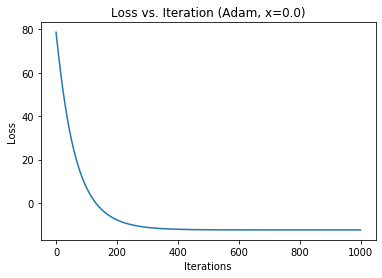

In [10]:
plt.plot(iterations, val_loss)
plt.title("Loss vs. Iteration (Adam, x=0.0)")
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

***
>$x=0.5$

In [11]:
#Initialize x to 0.5
x = tf.Variable(0.5)

In [12]:
#Loss fuction 
loss = lambda:(x-A)*(x-B)*(x-C)*(x-D)

In [13]:
#Create an instance of the optimizer with learning rate of .01
optimizer = tf.optimizers.Adam(.01)

In [14]:
iterations = []
x_opt = []
val_loss = []
for i in range (1000):
#for i in range(100):
#for i in range(400):
    iterations.append(i)
    optimizer.minimize(loss,x)
    x_opt.append(x)
    val_loss.append(foe(x))

In [15]:
tf.print('Iteration: ', iterations[0],'\n',
         'Loss: ', val_loss[0], '\n',
         'Optimized x: ', x_opt[0],'\n\n',
         'Iteration: ', iterations[399],'\n',
         'Loss: ', val_loss[399], '\n',
         'Optimized x: ', x_opt[399],'\n\n'
         'Iteration: ', iterations[999],'\n',
         'Loss: ', val_loss[999], '\n',
         'Optimized x: ', x_opt[999]
        )

Iteration:  0 
 Loss:  26.7974377 
 Optimized x:  1.81385744 

 Iteration:  399 
 Loss:  -12.3880863 
 Optimized x:  1.81385744 

Iteration:  999 
 Loss:  -12.392828 
 Optimized x:  1.81385744


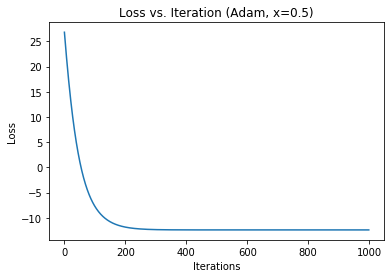

In [16]:
plt.plot(iterations, val_loss)
plt.title("Loss vs. Iteration (Adam, x=0.5)")
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

***
>$x=1.0$

In [17]:
#Initialize x to 1.0
x = tf.Variable(1.0)

In [18]:
#Loss fuction 
loss = lambda:(x-A)*(x-B)*(x-C)*(x-D)

In [19]:
#Create an instance of the optimizer with learning rate of .01
optimizer = tf.optimizers.Adam(.01)

In [20]:
iterations = []
x_opt = []
val_loss = []
for i in range (1000):
#for i in range(100):
#for i in range(400):
    iterations.append(i)
    optimizer.minimize(loss,x)
    x_opt.append(x)
    val_loss.append(foe(x))

In [21]:
tf.print('Iteration: ', iterations[0],'\n',
         'Loss: ', val_loss[0], '\n',
         'Optimized x: ', x_opt[0],'\n\n',
         'Iteration: ', iterations[399],'\n',
         'Loss: ', val_loss[399], '\n',
         'Optimized x: ', x_opt[399],'\n\n'
         'Iteration: ', iterations[999],'\n',
         'Loss: ', val_loss[999], '\n',
         'Optimized x: ', x_opt[999]
        )

Iteration:  0 
 Loss:  -0.356709629 
 Optimized x:  1.81385911 

 Iteration:  399 
 Loss:  -12.3928318 
 Optimized x:  1.81385911 

Iteration:  999 
 Loss:  -12.3928318 
 Optimized x:  1.81385911


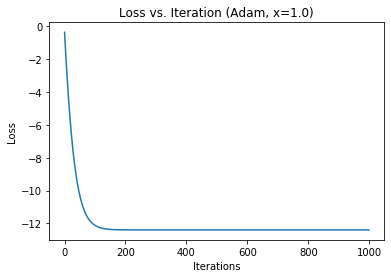

In [22]:
plt.plot(iterations, val_loss)
plt.title("Loss vs. Iteration (Adam, x=1.0)")
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

### SGD Optimizer
***
[Return to top](#Assignment-1:-Finding-the-Minimum-of-a-Function-Using-an-Optimizer)<br>
[Adam Optimizer](#Adam-Optimizer)<br>
[Ftrl Optimizer](#Ftrl-Optimizer)

>$x = 0.0$

In [23]:
#Create an instance of the optimizer with learning rate of .01
optimizer = tf.optimizers.SGD(.01)

In [24]:
#Initialize x to 0.0
x = tf.Variable(0.0)

In [25]:
#Loss fuction 
loss = lambda:(x-A)*(x-B)*(x-C)*(x-D)

In [26]:
iterations = []
x_opt = []
val_loss = []
for i in range (1000):
#for i in range(10):
#for i in range(100):
    iterations.append(i)
    optimizer.minimize(loss,x)
    x_opt.append(x)
    val_loss.append(foe(x))

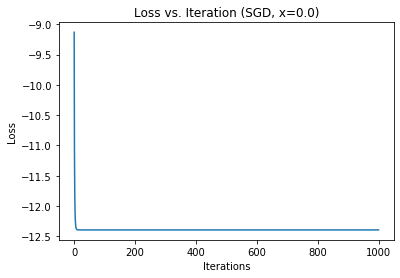

In [27]:
plt.plot(iterations, val_loss)
plt.title("Loss vs. Iteration (SGD, x=0.0)")
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

In [28]:
tf.print('Iteration: ', iterations[0],'\n',
         'Loss: ', val_loss[0], '\n',
         'Optimized x: ', x_opt[0],'\n\n',
         'Iteration: ', iterations[10],'\n',
         'Loss: ', val_loss[10], '\n',
         'Optimized x: ', x_opt[10],'\n\n'
         'Iteration: ', iterations[100],'\n',
         'Loss: ', val_loss[100], '\n',
         'Optimized x: ', x_opt[100],'\n\n',
         'Iteration: ', iterations[999],'\n'
         'Loss: ', val_loss[999], '\n',
         'Optimized x: ', x_opt[999]
        )

Iteration:  0 
 Loss:  -9.13296318 
 Optimized x:  1.81385922 

 Iteration:  10 
 Loss:  -12.3893671 
 Optimized x:  1.81385922 

Iteration:  100 
 Loss:  -12.3928299 
 Optimized x:  1.81385922 

 Iteration:  999 
Loss:  -12.3928299 
 Optimized x:  1.81385922


***
>$x=0.5$

In [29]:
#Initialize x to 0.5
x = tf.Variable(0.5)

In [30]:
#Loss fuction 
loss = lambda:(x-A)*(x-B)*(x-C)*(x-D)

In [31]:
#Create an instance of the optimizer with learning rate of .01
optimizer = tf.optimizers.SGD(.01)

In [32]:
iterations = []
x_opt = []
val_loss = []
for i in range (1000):
#for i in range(10):
#for i in range(100):
    iterations.append(i)
    optimizer.minimize(loss,x)
    x_opt.append(x)
    val_loss.append(foe(x))

In [33]:
tf.print('Iteration: ', iterations[0],'\n',
         'Loss: ', val_loss[0], '\n',
         'Optimized x: ', x_opt[0],'\n\n',
         'Iteration: ', iterations[10],'\n',
         'Loss: ', val_loss[10], '\n',
         'Optimized x: ', x_opt[10],'\n\n'
         'Iteration: ', iterations[100],'\n',
         'Loss: ', val_loss[100], '\n',
         'Optimized x: ', x_opt[100],'\n\n',
         'Iteration: ', iterations[999],'\n',
         'Loss: ', val_loss[999], '\n',
         'Optimized x: ', x_opt[999]
        )

Iteration:  0 
 Loss:  -7.50581503 
 Optimized x:  1.81385922 

 Iteration:  10 
 Loss:  -12.388546 
 Optimized x:  1.81385922 

Iteration:  100 
 Loss:  -12.3928299 
 Optimized x:  1.81385922 

 Iteration:  999 
 Loss:  -12.3928299 
 Optimized x:  1.81385922


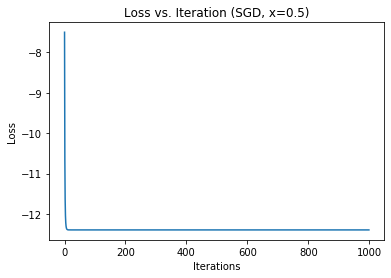

In [34]:
plt.plot(iterations, val_loss)
plt.title("Loss vs. Iteration (SGD, x=0.5)")
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

***
>$x=1.0$

In [35]:
#Initialize x to 1.0
x = tf.Variable(1.0)

In [36]:
#Loss fuction 
loss = lambda:(x-A)*(x-B)*(x-C)*(x-D)

In [37]:
#Create an instance of the optimizer with learning rate of .01
optimizer = tf.optimizers.SGD(.01)

In [38]:
iterations = []
x_opt = []
val_loss = []
for i in range (1000):
#for i in range(10):
#for i in range(100):
    iterations.append(i)
    optimizer.minimize(loss,x)
    x_opt.append(x)
    val_loss.append(foe(x))

In [39]:
tf.print('Iteration: ', iterations[0],'\n',
         'Loss: ', val_loss[0], '\n',
         'Optimized x: ', x_opt[0],'\n\n',
         'Iteration: ', iterations[10],'\n',
         'Loss: ', val_loss[10], '\n',
         'Optimized x: ', x_opt[10],'\n\n'
         'Iteration: ', iterations[100],'\n',
         'Loss: ', val_loss[100], '\n',
         'Optimized x: ', x_opt[100],'\n\n',
         'Iteration: ', iterations[999],'\n',
         'Loss: ', val_loss[999], '\n',
         'Optimized x: ', x_opt[999]
        )

Iteration:  0 
 Loss:  -9.13296318 
 Optimized x:  1.81385922 

 Iteration:  10 
 Loss:  -12.3893671 
 Optimized x:  1.81385922 

Iteration:  100 
 Loss:  -12.3928299 
 Optimized x:  1.81385922 

 Iteration:  999 
 Loss:  -12.3928299 
 Optimized x:  1.81385922


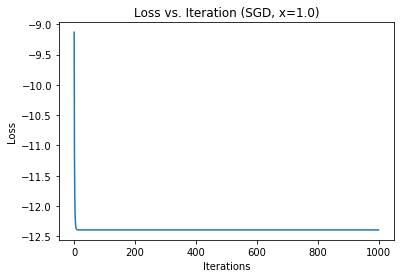

In [40]:
plt.plot(iterations, val_loss)
plt.title("Loss vs. Iteration (SGD, x=1.0)")
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

### Ftrl Optimizer
***
[Return to top](#Assignment-1:-Finding-the-Minimum-of-a-Function-Using-an-Optimizer)<br>
[Adam Optimizer](#Adam-Optimizer)<br>
[SGD Optimizer](#SGD-Optimizer)

>$x=0.0$

In [41]:
#Create an instance of the optimizer with learning rate of .01
optimizer = tf.optimizers.Ftrl(.01)

In [42]:
#Initialize x to 0.0
x = tf.Variable(0.0)

In [43]:
#Loss fuction 
loss = lambda:(x-A)*(x-B)*(x-C)*(x-D)

In [44]:
iterations = []
x_opt = []
val_loss = []
#for i in range (1000):
#for i in range(900):
#for i in range(1500):
#for i in range(2000):
for i in range(11000):
    iterations.append(i)
    optimizer.minimize(loss,x)
    x_opt.append(x)
    val_loss.append(foe(x))

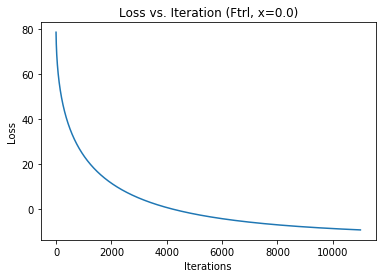

In [45]:
plt.plot(iterations, val_loss)
plt.title("Loss vs. Iteration (Ftrl, x=0.0)")
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

In [46]:
tf.print('Iteration: ', iterations[0],'\n',
         'Loss: ', val_loss[0], '\n',
         'Optimized x: ', x_opt[0], '\n\n'
         'Iteration: ', iterations[900],'\n',
         'Loss: ', val_loss[900], '\n',
         'Optimized x: ', x_opt[900],'\n\n',
         'Iteration: ', iterations[1000],'\n',
         'Loss: ', val_loss[1000], '\n',
         'Optimized x: ', x_opt[1000],'\n\n',
         'Iteration: ', iterations[1500],'\n',
         'Loss: ', val_loss[1500], '\n',
         'Optimized x: ', x_opt[1500],'\n\n'
         'Iteration: ', iterations[2000],'\n',
         'Loss: ', val_loss[2000], '\n',
         'Optimized x: ', x_opt[2000],'\n\n',
         'Iteration: ', iterations[10999],'\n',
         'Loss: ', val_loss[10999], '\n',
         'Optimized x: ', x_opt[10999]
        )

Iteration:  0 
 Loss:  78.6469 
 Optimized x:  1.36748457 

Iteration:  900 
 Loss:  25.6695366 
 Optimized x:  1.36748457 

 Iteration:  1000 
 Loss:  23.7910538 
 Optimized x:  1.36748457 

 Iteration:  1500 
 Loss:  16.5438786 
 Optimized x:  1.36748457 

Iteration:  2000 
 Loss:  11.5198841 
 Optimized x:  1.36748457 

 Iteration:  10999 
 Loss:  -9.25099468 
 Optimized x:  1.36748457


***
>$x=0.5$

In [47]:
#Create an instance of the optimizer with learning rate of .01
optimizer = tf.optimizers.Ftrl(.01)

In [48]:
#Initialize x to 0.5
x = tf.Variable(0.5)

In [49]:
#Loss fuction 
loss = lambda:(x-A)*(x-B)*(x-C)*(x-D)

In [50]:
iterations = []
x_opt = []
val_loss = []
#for i in range (1000):
#for i in range(900):
#for i in range(1500):
#for i in range(2000):
for i in range(11000):
    iterations.append(i)
    optimizer.minimize(loss,x)
    x_opt.append(x)
    val_loss.append(foe(x))

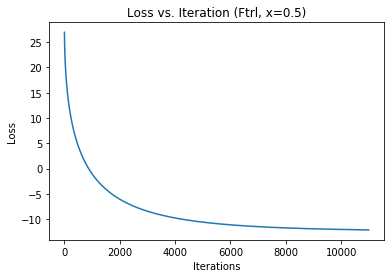

In [51]:
plt.plot(iterations, val_loss)
plt.title("Loss vs. Iteration (Ftrl, x=0.5)")
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

In [52]:
tf.print('Iteration: ', iterations[0],'\n',
         'Loss: ', val_loss[0], '\n',
         'Optimized x: ', x_opt[0], '\n\n'
         'Iteration: ', iterations[900],'\n',
         'Loss: ', val_loss[900], '\n',
         'Optimized x: ', x_opt[900],'\n\n',
         'Iteration: ', iterations[1000],'\n',
         'Loss: ', val_loss[1000], '\n',
         'Optimized x: ', x_opt[1000],'\n\n',
         'Iteration: ', iterations[1500],'\n',
         'Loss: ', val_loss[1500], '\n',
         'Optimized x: ', x_opt[1500],'\n\n'
         'Iteration: ', iterations[2000],'\n',
         'Loss: ', val_loss[2000], '\n',
         'Optimized x: ', x_opt[2000],'\n\n',
         'Iteration: ', iterations[10999],'\n',
         'Loss: ', val_loss[10999], '\n',
         'Optimized x: ', x_opt[10999]
        )

Iteration:  0 
 Loss:  26.9537411 
 Optimized x:  1.6710664 

Iteration:  900 
 Loss:  -0.209309801 
 Optimized x:  1.6710664 

 Iteration:  1000 
 Loss:  -1.0340091 
 Optimized x:  1.6710664 

 Iteration:  1500 
 Loss:  -4.0815835 
 Optimized x:  1.6710664 

Iteration:  2000 
 Loss:  -6.05039883 
 Optimized x:  1.6710664 

 Iteration:  10999 
 Loss:  -12.1167154 
 Optimized x:  1.6710664


***
>$x=1.0$

In [53]:
#Create an instance of the optimizer with learning rate of .01
optimizer = tf.optimizers.Ftrl(.01)

In [54]:
#Initialize x to 0.5
x = tf.Variable(1.0)

In [55]:
#Loss fuction 
loss = lambda:(x-A)*(x-B)*(x-C)*(x-D)

In [56]:
iterations = []
x_opt = []
val_loss = []
#for i in range (1000):
#for i in range(900):
#for i in range(1500):
#for i in range(2000):
for i in range(11000):
    iterations.append(i)
    optimizer.minimize(loss,x)
    x_opt.append(x)
    val_loss.append(foe(x))

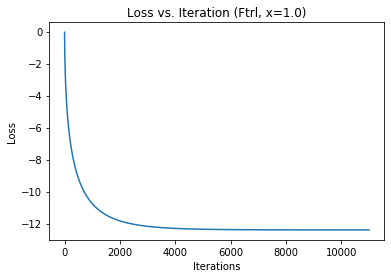

In [57]:
plt.plot(iterations, val_loss)
plt.title("Loss vs. Iteration (Ftrl, x=1.0)")
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

In [58]:
tf.print('Iteration: ', iterations[0],'\n',
         'Loss: ', val_loss[0], '\n',
         'Optimized x: ', x_opt[0], '\n\n'
         'Iteration: ', iterations[900],'\n',
         'Loss: ', val_loss[900], '\n',
         'Optimized x: ', x_opt[900],'\n\n',
         'Iteration: ', iterations[1000],'\n',
         'Loss: ', val_loss[1000], '\n',
         'Optimized x: ', x_opt[1000],'\n\n',
         'Iteration: ', iterations[1500],'\n',
         'Loss: ', val_loss[1500], '\n',
         'Optimized x: ', x_opt[1500],'\n\n'
         'Iteration: ', iterations[2000],'\n',
         'Loss: ', val_loss[2000], '\n',
         'Optimized x: ', x_opt[2000],'\n\n',
         'Iteration: ', iterations[10999],'\n',
         'Loss: ', val_loss[10999], '\n',
         'Optimized x: ', x_opt[10999]
        )

Iteration:  0 
 Loss:  -0.0437248796 
 Optimized x:  1.80829597 

Iteration:  900 
 Loss:  -10.535305 
 Optimized x:  1.80829597 

 Iteration:  1000 
 Loss:  -10.7501812 
 Optimized x:  1.80829597 

 Iteration:  1500 
 Loss:  -11.4569921 
 Optimized x:  1.80829597 

Iteration:  2000 
 Loss:  -11.8291693 
 Optimized x:  1.80829597 

 Iteration:  10999 
 Loss:  -12.3924398 
 Optimized x:  1.80829597


### Observations
***
[Return to top](#Assignment-1:-Finding-the-Minimum-of-a-Function-Using-an-Optimizer)<br>
[Adam Optimizer](#Adam-Optimizer)<br>
[SGD Optimizer](#SGD-Optimizer)<br>
[Ftrl Optimizer](#Ftrl-Optimizer)

In [59]:
%%html
<style>
table {float:left}
</style>

<table>
<tr><th>Values of x and iterations used by Optimizer </th><th>Best Performing combination</th></tr>
<tr><td>

|                    	| Value of x            | Iterations                            |
|:-------------------	|-----------------------|---------------------------------------|
| **Adam Optimizer** 	| 0.0<br>0.5<br>1.0 	|              100<br>400<br>1000       |
|  **SGD Optimizer** 	| 0.0<br>0.5<br>1.0 	|               10<br>100<br>1000      	|
| **Ftrl Optimizer** 	| 0.0<br>0.5<br>1.0 	| 900<br>1000<br>1500<br>2000<br>11000 	|

</td><td>

|                    	| Value of x 	| Iterations 	| Optimized x 	|     Loss    	|
|:------------------	|:----------:	|:----------:	|:-----------:	|:-----------:	|
| **Adam Optimizer** 	|     1.0    	|     400    	|  1.81325269 	| -12.3928251 	|
|  **SGD Optimizer** 	|     1.0    	|     10     	|  1.81385922 	| -12.3928299 	|
| **Ftrl Optimizer** 	|     1.0    	|    11000   	|  1.80829597 	| -12.3924398 	|
</td></tr> </table>

#### Number of iterations 

For Adam optimizer the bests number of iterations chosen was 400. Around that number, the loss becomes quite constant and there is no much difference from greater number of iterations regardles of its initial value of x. 

For SGD the number of iterations chosen was 10. Like Adam optimizer, this one becomes constant around 10, therefore no further iterations were necessary.

On the other hand, Ftrl Optimizer requires a significantly higher number of iterations to reach the minimum loss found with the previous two optimizers. Several trials were made and was determined that 11000 would be the closest to get the minimum loss. 


#### Plots

Another indicator to take into account are the initial and final plots, where it can be observed how the curve which represents the loss, is gradually flattened out as the values of x are adjusted by the optimizers until it reaches a point were the loss no longer makes significant changes from each iteration.

#### Final remarks

In the different optimizers the values of x found were able to minimize the loss. The one that converged the fastest was SGD since at 10 iterations it was able to minimize the loss. While several initial values of x were tested, the final outputs(i.e. Optimized x and Loss) all them provide values very close to each other. 